In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
import os
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv
/kaggle/input/nasa-nearest-earth-objects/neo.csv


In [2]:
data = pd.read_csv('../input/nasa-nearest-earth-objects/neo.csv')

In [3]:
data.shape

(90836, 10)

In [4]:
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [5]:
data.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [6]:
data ['hazardous'].value_counts()

False    81996
True      8840
Name: hazardous, dtype: int64

In [7]:
data_1 = data.drop(['id','name','orbiting_body'],axis=1)

In [8]:
data['sentry_object'].value_counts()

False    90836
Name: sentry_object, dtype: int64

In [9]:
data_2 = data_1.drop(['sentry_object'],axis=1)

In [10]:
data_2

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
...,...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00,False
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00,False
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60,False
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80,False


In [11]:
data_2.corr()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
est_diameter_min,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363
est_diameter_max,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363
relative_velocity,0.221553,0.221553,1.000000,0.327169,-0.353863,0.191185
miss_distance,0.142241,0.142241,0.327169,1.000000,-0.264168,0.042302
absolute_magnitude,-0.560188,-0.560188,-0.353863,-0.264168,1.000000,-0.365267
hazardous,0.183363,0.183363,0.191185,0.042302,-0.365267,1.000000


<AxesSubplot:>

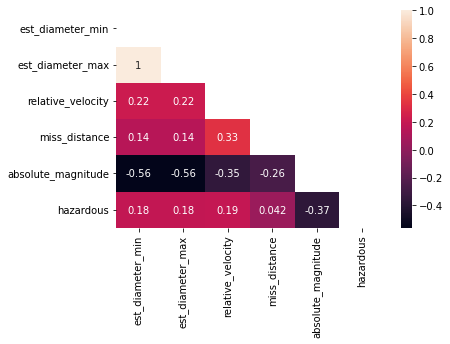

In [12]:
mask = np.triu(np.ones_like(data_2.corr(), dtype=bool))
sns.heatmap(data_2.corr(),mask = mask ,annot=True)

In [13]:
X = data.drop(['id','name','est_diameter_max','orbiting_body','sentry_object','hazardous'],axis=1) 

y = data.hazardous.astype('int')
print(X.shape,y.shape)

(90836, 4) (90836,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size = 0.2, random_state = 0)

In [15]:
XGBC = XGBClassifier()
XGBC.fit(X_train, y_train)
XGBC_pred = XGBC.predict(X_test)
acc_XGBC = round(accuracy_score(XGBC_pred, y_test) * 100, 2)
print(acc_XGBC)

91.69


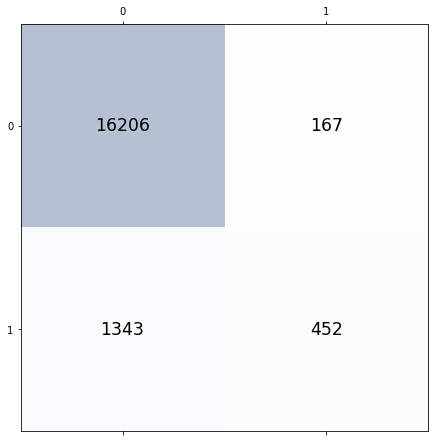

In [16]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=XGBC_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

In [17]:
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)
acc_KNN = round(accuracy_score(KNN_pred, y_test) * 100, 2)
print(acc_KNN)


88.06


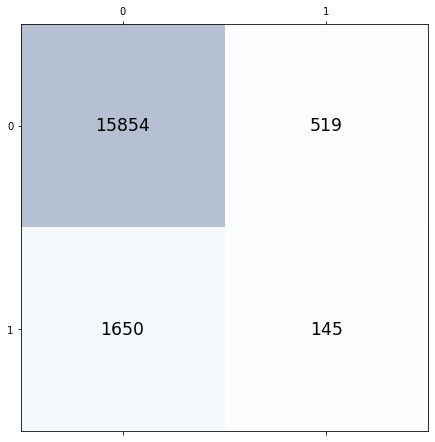

In [18]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=KNN_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

In [19]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
GNB_pred = GNB.predict(X_test)
acc_GNB = round(accuracy_score(GNB_pred, y_test) * 100, 2)
print(acc_GNB)

89.57


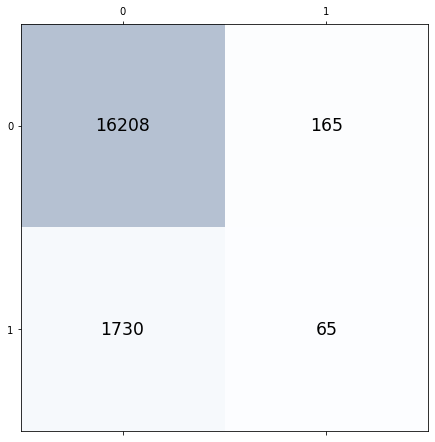

In [20]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=GNB_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

In [21]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)
acc_RF = round(accuracy_score(RF_pred, y_test) * 100, 2)
print(acc_RF)

91.84


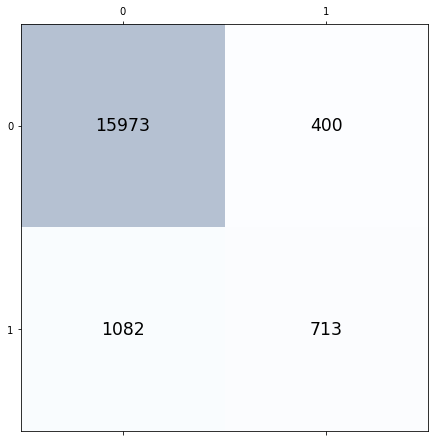

In [22]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=RF_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

In [23]:
SGDC = SGDClassifier()
SGDC.fit(X_train, y_train)
SGDC_pred = SGDC.predict(X_test)
acc_SGDC = round(accuracy_score(SGDC_pred, y_test) * 100, 2)
print(acc_SGDC)

86.21


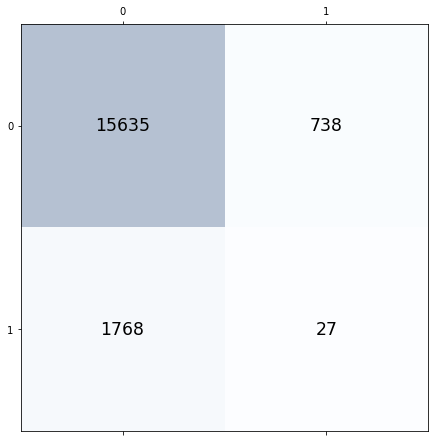

In [24]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=SGDC_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

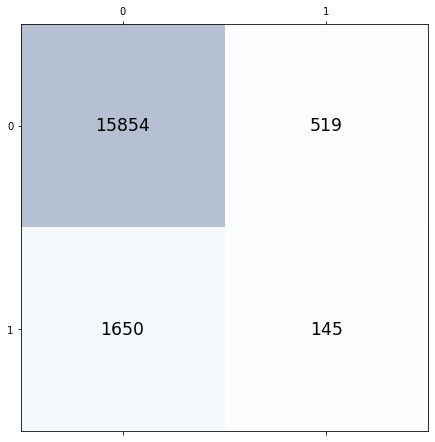

In [25]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=KNN_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

In [26]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
DTC_pred = DTC.predict(X_test)
acc_DTC = round(accuracy_score(DTC_pred, y_test) * 100, 2)
print(acc_DTC)

89.31


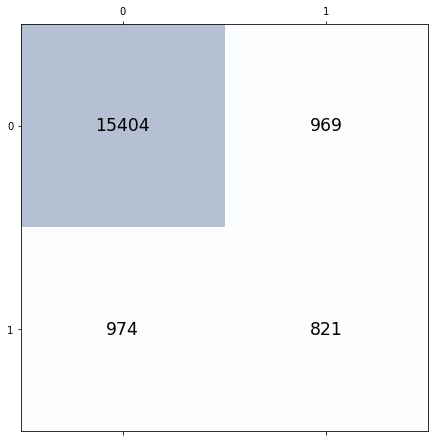

In [27]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=DTC_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

In [28]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'XG Boost', 'Gaussian Naive Bayes','SGD Classifier', 
              'KNeighborsClassifier', 'DecisionTreeClassifier'],
    'Score': [acc_RF, acc_XGBC, acc_GNB,acc_SGDC, 
              acc_KNN, acc_DTC]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Random Forest,91.84
1,XG Boost,91.69
2,Gaussian Naive Bayes,89.57
5,DecisionTreeClassifier,89.31
4,KNeighborsClassifier,88.06
3,SGD Classifier,86.21


In [29]:
classifier = Sequential()
classifier.add(Dense(12, input_dim=4, activation='relu'))
classifier.add(Dense(8, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))
classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.summary()

# Fit Model

history = classifier.fit(X_train, y_train, batch_size = 18, epochs = 10,
    validation_split=0.1,verbose = 1,shuffle=True)

# Accuracy 90.2% (5 epochs) 

_, accuracy = classifier.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2022-06-26 15:44:56.009688: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-06-26 15:44:56.194325: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3634/3634 [==============================] - 6s 2ms/step - loss: 9130.8066 - accuracy: 0.7983 - val_loss: 22384.1602 - val_accuracy: 0.9088
Epoch 2/10
3634/3634 [==============================] - 6s 2ms/step - loss: 8010.8872 - accuracy: 0.8085 - val_loss: 1179.1106 - val_accuracy: 0.9088
Epoch 3/10
3634/3634 [==============================] - 6s 2ms/step - loss: 6843.8296 -